# 5.Mass assignment schemes

### Nearest grid point method

We define the 1D particle shape as S(x) to be the mass density at the distance x from the particle for cell size $\Delta x$. In this exercise we will use periodic boundary conditions. 

$ S(x) = \frac{1}{\Delta x} \delta(\frac{x}{\Delta x})$



In [220]:
import numpy as np 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from importlib import reload
import a2_5 as a2
import scipy.signal as sig

In [57]:
np.random.seed(121)
N = 16
positions = np.random.uniform(low=0,high=16,size=(3,1024))

/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


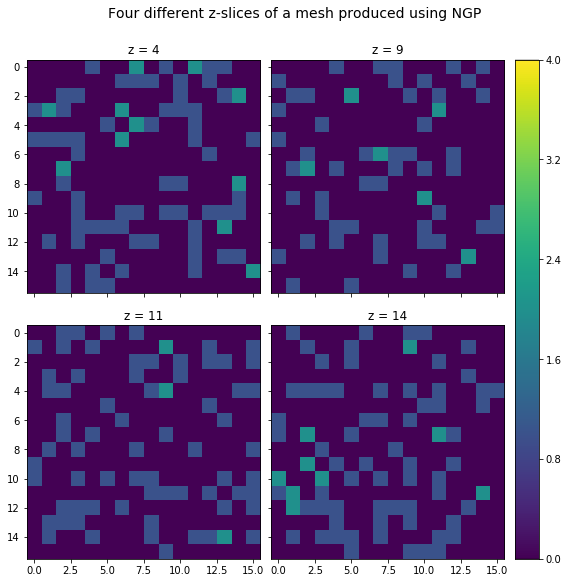

In [70]:
reload(a2)

mesh = a2.NGP(positions,N)
vmax = np.max(mesh)

fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(2, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(mesh[:,:,3],vmin=0, vmax=vmax)
grid[0].set_title('z = 4')
im = grid[1].imshow(mesh[:,:,8],vmin=0, vmax=vmax)
grid[1].set_title('z = 9')
im = grid[2].imshow(mesh[:,:,10],vmin=0, vmax=vmax)
grid[2].set_title('z = 11')
im = grid[3].imshow(mesh[:,:,13],vmin=0, vmax=vmax)
grid[3].set_title('z = 14')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('Four different z-slices of a mesh produced using NGP',x=0.38,y=0.64,fontsize=14)
plt.tight_layout()
plt.show()


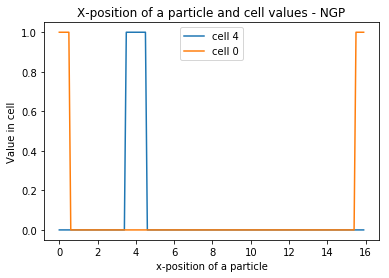

In [132]:
test_points = np.arange(0,16,0.1)
cell4 = np.zeros(len(test_points))
cell0 = np.zeros(len(test_points))

for i in range(len(test_points)):
    mesh = np.zeros(N)
    x = np.round(test_points[i])%N
    mesh[int(x)] += 1
    cell4[i] = mesh[4]
    cell0[i] = mesh[0]
    
plt.plot(test_points,cell4,label='cell 4')
plt.plot(test_points,cell0,label='cell 0')
plt.xlabel('x-position of a particle')
plt.ylabel('Value in cell')
plt.title('X-position of a particle and cell values - NGP')
plt.legend()
plt.show()

### Cloud-In-Cell method


/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


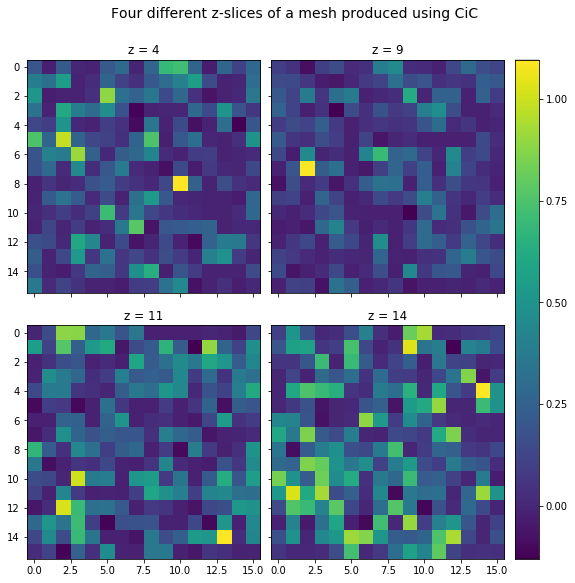

In [363]:
reload(a2)

mesh = a2.CiC(positions,16)

vmax = np.max(mesh)
fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(2, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(mesh[:,:,0])#,vmin=0, vmax=vmax)
grid[0].set_title('z = 4')
im = grid[1].imshow(mesh[:,:,8])#,vmin=0, vmax=vmax)
grid[1].set_title('z = 9')
im = grid[2].imshow(mesh[:,:,10])#,vmin=0, vmax=vmax)
grid[2].set_title('z = 11')
im = grid[3].imshow(mesh[:,:,13])#,vmin=0, vmax=vmax)
grid[3].set_title('z = 14')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('Four different z-slices of a mesh produced using CiC',x=0.38,y=0.64,fontsize=14)
fig.tight_layout()
plt.show()


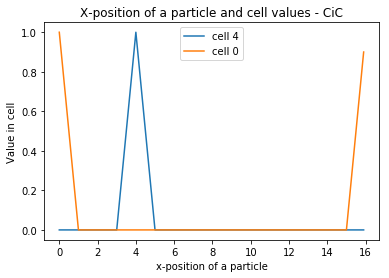

In [133]:
test_points = np.arange(0,16,0.1)
cell4 = np.zeros(len(test_points))
cell0 = np.zeros(len(test_points))
for i in range(len(test_points)):
    w = np.zeros(2)
    mesh = np.zeros(N)
    x = np.round(test_points[i])
    dx = x-test_points[i]
    sx = np.sign(dx)
    dx = np.abs(dx)
    x=x%N
    w[0] = 1-dx
    w[1] = dx
    mesh[np.int(x)%N]+=w[0]
    mesh[np.int(x-sx)%N]+=w[1]
    cell4[i] = mesh[4]
    cell0[i] = mesh[0]
    
plt.plot(test_points,cell4,label='cell 4')
plt.plot(test_points,cell0,label='cell 0')
plt.xlabel('x-position of a particle')
plt.ylabel('Value in cell')
plt.title('X-position of a particle and cell values - CiC')
plt.legend()
plt.show()

In [138]:
def fft1D(x,Nj,start=0,step=1):
    #if Nj%2 > 0:
    #    raise ValueError('Size of input array must be a power of 2')
    if Nj == 1: 
        return [x[start]]
    new_step = step*2
    hNj = Nj//2
    rs = fft1D(x,hNj,start,new_step)+fft1D(x,hNj,start+step,new_step)
    for i in range(hNj):
        rs[i],rs[i+hNj]=rs[i]+np.exp(-2j*np.pi*i/Nj)*rs[i+hNj],rs[i]-np.exp(-2j*np.pi*i/Nj)*rs[i+hNj]
    return rs

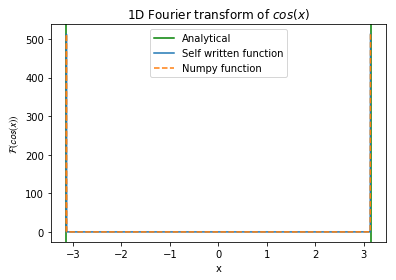

In [380]:
reload(a2)
f = lambda x: np.cos(x)
#fftf = lambda x: np.pi*(sig.unit_impulse(x,-2*np.pi)+sig.unit_impulse(x,2*np.pi))
x = np.linspace(-np.pi,np.pi,1024)
fx = f(x)
k = (np.pi)
fftself = a2.fft1D(fx,len(fx))
fftnumpy = np.fft.fft(fx)
plt.axvline(x=k,color='green')
plt.axvline(x=-k,color='green',label='Analytical')
plt.plot(x,np.abs(fftself),label='Self written function')
plt.plot(x,np.abs(fftnumpy),ls='--',label='Numpy function')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\mathcal{F(cos(x))}}$')
plt.title('1D Fourier transform of $cos(x)$')
plt.show()

/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


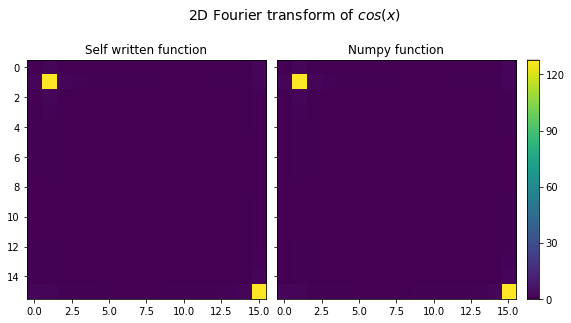

In [381]:
reload(a2)
f2d = lambda x,y: np.cos(x+y)
N = 16
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
f2dxy = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        f2dxy[i][j] = f2d(x[i],y[j])

fftself2 = a2.fft2D(f2dxy)
fftnumpy2 = np.fft.fft2(f2dxy)

fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(1, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(np.abs(fftself2))#,vmin=0, vmax=vmax)
grid[0].set_title('Self written function')
im = grid[1].imshow(np.abs(fftnumpy2))#,vmin=0, vmax=vmax)
grid[1].set_title('Numpy function')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('2D Fourier transform of $cos(x)$',x=0.38,y=0.58,fontsize=14)
fig.tight_layout()
plt.show()

/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


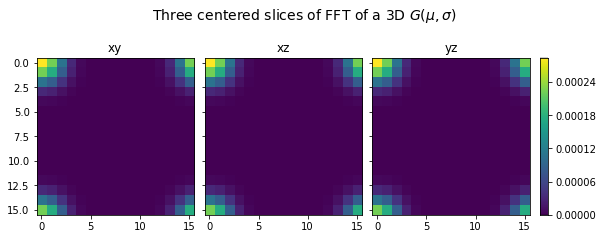

In [385]:
g3D = lambda x,y,z,mu,sig: 1/(sig*(2*np.pi)**0.5)*np.exp((-(x-mu)**2-(y-mu)**2-(z-mu)**2)/sig**2) 
N = 16
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
z = np.linspace(-3,3,N)
f3d = np.zeros((N,N,N))
for i in range(N):
    for j in range(N):
        for k in range(N):
            f3d[i][j][k] = g3D(x[i],y[j],z[k],0,1)

fft_f3d = np.abs(a2.fft3D(f3d))         
            
vmax = np.max(fft_mesh)
fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(1, 3),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(fft_f3d[:,:,7])
grid[0].set_title('xy')
im = grid[1].imshow(fft_f3d[:,7,:])
grid[1].set_title('xz')
im = grid[2].imshow(fft_f3d[7,:,:])
grid[2].set_title('yz')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('Three centered slices of FFT of a 3D $G(\mu,\sigma)$',x=0.38,y=0.56,fontsize=14)
fig.tight_layout()
plt.show()


In [386]:
reload(a2)
mean = np.mean(mesh)
mesh_n = (mesh-mean)/mean
#print(mesh_n)
fft_mesh = a2.fft3D(mesh_n)/N**3
N = 16
for l in range(N):
    if l <= (N//2):
        k_z = (l)*2*np.pi/N
    else:
        k_z = (-N+l)*2*np.pi/N
    
    for j in range(N):
        if i <= (N//2):
            k_y = (j)*2*np.pi/N
        else:
            k_y = (-N+j)*2*np.pi/N
        
        for i in range(N):
            if i <= (N//2):
                k_x = (i)*2*np.pi/N
            else:
                k_x = (-N+i)*2*np.pi/N
                
            # Calculating k     
            k = (k_x**2+k_y**2+k_z**2)**0.5
            if k == 0:
                k = 1
            fft_mesh[i][j][l] = fft_mesh[i][j][l]*k**(-2)
            
grav_p = a2.fft3D(fft_mesh,inv=True)
            
        

/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


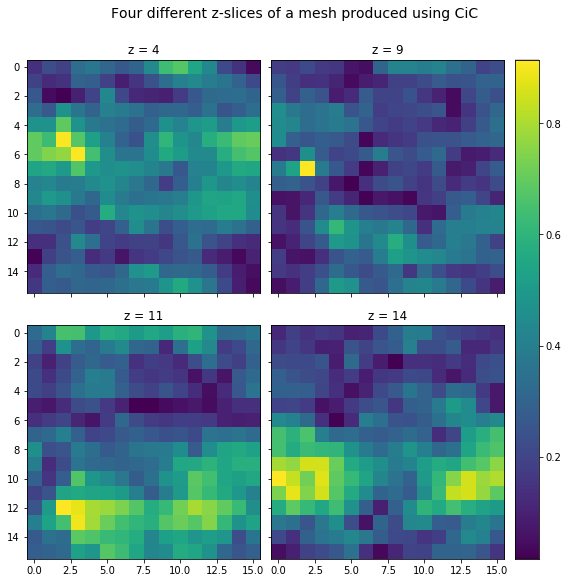

In [387]:
grav_p = np.abs(grav_p)

vmax = np.max(fft_mesh)
fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(2, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(grav_p[:,:,0])#,vmin=0, vmax=vmax)
grid[0].set_title('z = 4')
im = grid[1].imshow(grav_p[:,:,8])#,vmin=0, vmax=vmax)
grid[1].set_title('z = 9')
im = grid[2].imshow(grav_p[:,:,10])#,vmin=0, vmax=vmax)
grid[2].set_title('z = 11')
im = grid[3].imshow(grav_p[:,:,13])#,vmin=0, vmax=vmax)
grid[3].set_title('z = 14')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('Four different z-slices of a mesh produced using CiC',x=0.38,y=0.64,fontsize=14)
fig.tight_layout()
plt.show()

/software/local/lib64/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


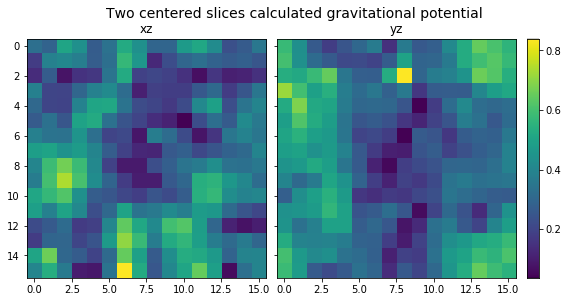

In [388]:
vmax = np.max(grav_p)
fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(1, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(grav_p[:,7,:])#,vmin=0, vmax=vmax)
grid[0].set_title('xz')
im = grid[1].imshow(grav_p[7,:,:])#,vmin=0, vmax=vmax)
grid[1].set_title('yz')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
fig.suptitle('Two centered slices calculated gravitational potential',x=0.38,y=0.57,fontsize=14)
fig.tight_layout()
plt.show()

In [418]:
reload(a2)
gradx,grady,gradz = a2.central_diff_3D(grav_p)
positions_grad = a2.CiC_reverse(positions,gradx,grady,gradz,16)
print('Potential gradient output:')
print('[x,y,z]')
for i in range(len(positions_grad[0])):
    print(positions_grad[:,i])
#print(positions_grad[:,:10])

Potential gradient output:
[x,y,z]
[5.08808058e-01 3.08650779e-04 1.68811888e-01]
[ 0.23984587 -0.08231249 -0.32767697]
[-0.0138786   0.01586179 -0.24372081]
[ 0.21567265 -0.10735527  0.29234552]
[ 0.15196136 -0.05566411 -0.08047141]
[0.20694978 0.03244246 0.05488023]
[ 0.11346534 -0.10504644 -0.11604878]
[ 0.00781276 -0.21064205 -0.24514963]
[-0.1521923   0.00329643  0.33940659]
[-0.13377353 -0.11253401 -0.049315  ]
[-0.04071752 -0.10339725  0.02029819]
[ 0.10855132  0.12288865 -0.13495527]
[-0.02255934  0.0298366  -0.09668738]
[-0.07254674  0.09552258  0.12982572]
[-0.03811861 -0.13816888  0.06090566]
[-0.1128026  -0.05632407 -0.10248642]
[ 0.13503562  0.25839372 -0.03592556]
[ 0.03373369 -0.08428668 -0.09778482]
[-0.10642763  0.02030569 -0.14035123]
[-0.19086308 -0.32547047 -0.27716512]
[-0.03054332 -0.12339824  0.03987376]
[-0.0822002  -0.09682501  0.20482576]
[-0.10964248  0.0552313   0.11474606]
[-0.21193762 -0.07298902 -0.30570489]
[0.00596489 0.05392859 0.18486691]
[-0.03078542